In [11]:
import numpy as np
import pandas as pd
import seaborn
import random


def randomSales(count, min, max):
    li = []
    for i in range(0, count):
        tmp = random.randint(min, max)
        li.append(tmp)
    return li


sales = pd.DataFrame({
    'Nintendo 2DS XL': randomSales(12, 10, 35),
    'Nintendo Switch': randomSales(12, 10, 50),
    'Nintendo 3DS XL': randomSales(12, 10, 40),
    'Nintendo DSi XL': randomSales(12, 10, 25),
    'Nintendo DS Lite': randomSales(12, 10, 30),
    'Game Boy Micro': randomSales(12, 10, 20),
    'Game Boy Advance SP': randomSales(12, 10, 15),
    'Pokémon Mini': randomSales(12, 5, 10),
    'Game Boy Color': randomSales(12, 10, 45),
    'Wii': randomSales(12, 7, 15)
})

print(sales)

    Nintendo 2DS XL  Nintendo Switch  Nintendo 3DS XL  Nintendo DSi XL  \
0                29               16               12               25   
1                19               44               11               20   
2                20               17               31               13   
3                20               17               18               24   
4                24               12               27               16   
5                11               26               39               11   
6                14               50               11               13   
7                32               42               32               19   
8                33               32               27               20   
9                11               25               39               12   
10               12               42               23               23   
11               35               45               14               15   

    Nintendo DS Lite  Game Boy Micro 

Nintendo 2DS XL        21.666667
Nintendo Switch        30.666667
Nintendo 3DS XL        23.666667
Nintendo DSi XL        17.583333
Nintendo DS Lite       19.333333
Game Boy Micro         15.250000
Game Boy Advance SP    12.916667
Pokémon Mini            7.416667
Game Boy Color         29.333333
Wii                    10.500000
dtype: float64


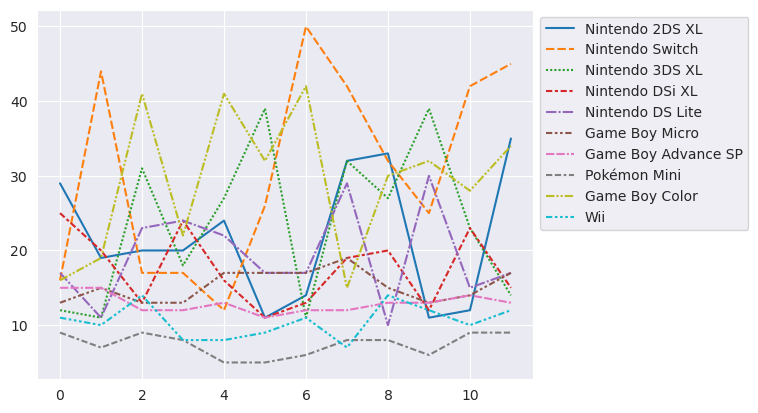

In [12]:
lp = seaborn.lineplot(sales)
seaborn.move_legend(lp, 'upper left', bbox_to_anchor=(1, 1))


p0 = sales.sum() / sales.shape[0]
print(p0)

In [13]:
square_std = ((sales - p0) ** 2).sum() / (sales.shape[0] - 1)
std = square_std ** 0.5
reliability = std / p0
print(reliability)

Nintendo 2DS XL        0.409200
Nintendo Switch        0.440428
Nintendo 3DS XL        0.441078
Nintendo DSi XL        0.279098
Nintendo DS Lite       0.329601
Game Boy Micro         0.137335
Game Boy Advance SP    0.096009
Pokémon Mini           0.210914
Game Boy Color         0.327419
Wii                    0.216796
dtype: float64


In [14]:

predict = pd.DataFrame([p0 + np.random.normal(0, std, len(p0))])
print(predict)

   Nintendo 2DS XL  Nintendo Switch  Nintendo 3DS XL  Nintendo DSi XL  \
0        19.308609        12.052015        29.027559        16.441294   

   Nintendo DS Lite  Game Boy Micro  Game Boy Advance SP  Pokémon Mini  \
0         20.071601        17.39232             9.883955      7.813184   

   Game Boy Color       Wii  
0       40.256289  8.320838  


In [15]:
cond_1 = ((sales - p0) < 2 * std).all()
cond_2 = p0 > 2 * std
cond_3 = (sales > 0).all()

print('Условие 1: ')
print(cond_1)
print('\n')
print('Условие 2: ')
print(cond_2)
print('\n')
print('Условие 3: ')
print(cond_3)

Условие 1: 
Nintendo 2DS XL        True
Nintendo Switch        True
Nintendo 3DS XL        True
Nintendo DSi XL        True
Nintendo DS Lite       True
Game Boy Micro         True
Game Boy Advance SP    True
Pokémon Mini           True
Game Boy Color         True
Wii                    True
dtype: bool


Условие 2: 
Nintendo 2DS XL        True
Nintendo Switch        True
Nintendo 3DS XL        True
Nintendo DSi XL        True
Nintendo DS Lite       True
Game Boy Micro         True
Game Boy Advance SP    True
Pokémon Mini           True
Game Boy Color         True
Wii                    True
dtype: bool


Условие 3: 
Nintendo 2DS XL        True
Nintendo Switch        True
Nintendo 3DS XL        True
Nintendo DSi XL        True
Nintendo DS Lite       True
Game Boy Micro         True
Game Boy Advance SP    True
Pokémon Mini           True
Game Boy Color         True
Wii                    True
dtype: bool


In [16]:
product_color = pd.Series(dtype='string')
for product in sales.columns:
    if not cond_3[product]:
        product_color[product] = 'Red'
    elif not cond_1[product] and not cond_2[product]:
        product_color[product] = 'Orange'
    elif not cond_1[product] or not cond_2[product]:
        product_color[product] = 'Yellow'
    else:
        product_color[product] = 'Green'

print(product_color)

Nintendo 2DS XL        Green
Nintendo Switch        Green
Nintendo 3DS XL        Green
Nintendo DSi XL        Green
Nintendo DS Lite       Green
Game Boy Micro         Green
Game Boy Advance SP    Green
Pokémon Mini           Green
Game Boy Color         Green
Wii                    Green
dtype: object
